<div style="line-height:0.5">
<h1 style="color:#202dbd"> Features Extraction </h1>
</div>
<div style="line-height:1.5">
<div style="margin-top: -10px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> colormaps + PCA + sklearn discriminant_analysis + matplotlip legend
</span>
</div>
</div>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colormaps as colmp

from sklearn import datasets
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras.datasets import mnist

from scipy.sparse import csr_matrix

<h2 style="color:#202dbd"> Reducing Features Using Principal Components </h2>

In [4]:
digits = datasets.load_digits()
# Standardize the feature matrix
features = StandardScaler().fit_transform(digits.data) 

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True) 
# Conduct PCA
features_pca = pca.fit_transform(features) 

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 64
Reduced number of features: 54


In [5]:
# Create data  => # What about linearly inseparable data????
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1) 

# Apply kernal PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1) 
features_kpca = kpca.fit_transform(features)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


<h2 style="color:#202dbd"> Reducing Features by Maximizing Class Separability </h2>

In [8]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create and run an LDA, then use it to transform the features
lda = LinearDiscriminantAnalysis(n_components=1) 
features_lda = lda.fit(features, target).transform(features)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_lda.shape[1])

# To view the amount of variance explained by each component.  
# In our case the single component explained over 99% of the variance
lda.explained_variance_ratio_  

Original number of features: 4
Reduced number of features: 1


array([0.9912126])

In [ ]:
""" Linear Discriminant Analysis
N.B.
Specifically, we can run LinearDiscriminantAnalysis with n_components set to None, 
to return the ratio of variance explained by every component feature, then calculate how many components are requ 1ed 
to get above some threshold of variance explained (often 0.95 or 0.99).
"""
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)

# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_  
# Create the array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

In [ ]:
def select_n_components(var_ratio, goal_var: float) -> int: 
    """ Select features. """
    n_components, total_variance = 0, 0.0                        
    # Iterate for the explained variance of each feature:
    for explained_variance in var_ratio:        
        # Add the explained variance to the total
        total_variance += explained_variance            
        n_components += 1                               
        # Exit, if our goal level of explained variance is reached
        if total_variance >= goal_var:                  
            print("exiting...")
            break

    return n_components

In [23]:
compo = select_n_components(lda_var_ratios, 0.95)
compo1 = select_n_components(lda_var_ratios, 1.95)
compo2 = select_n_components(lda_var_ratios, 2.95)
compo3 = select_n_components(lda_var_ratios, 3.95)
compo4 = select_n_components(lda_var_ratios, 4.95)
compo5 = select_n_components(lda_var_ratios, 5.95)
compo6 = select_n_components(lda_var_ratios, 2316.95)

print(compo)
print(compo1)
print(compo2)
print(compo3)
print(compo4)
print(compo5)
print(compo6)



exiting...
1
2
2
2
2
2
2


<h2 style="color:#202dbd"> Reducing Features Using Matrix Factorization </h2>
With a feature matrix of nonnegative values and want to reduce the dimensionality. 

In [26]:
""" Non-negative matrix factorization (NMF) to reduce the dimensionality of the feature matrix. 
N.B.
Set max_iter to avoid ConvergenceWarning: Maximum number of iterations reached.
"""
digits = datasets.load_digits()
features = digits.data
nmf = NMF(n_components=10, random_state=1, max_iter=100000) 
features_nmf = nmf.fit_transform(features)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_nmf.shape[1])

Original number of features: 64
Reduced number of features: 10


In [30]:
""" Work with sparse data """

digits = datasets.load_digits()
# Standardize feature matrix
features = StandardScaler().fit_transform(digits.data) 
# Make sparse matrix
features_sparse = csr_matrix(features) 

## Create a TSVD
tsvd = TruncatedSVD(n_components=10)
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse) 

print("Original number of features:", features_sparse.shape[1])
print("Reduced number of features:", features_sparse_tsvd.shape[1])      

Original number of features: 64
Reduced number of features: 10


<h2 style="color:#202dbd"> Reducing Features Using PCA 1 </h2>

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

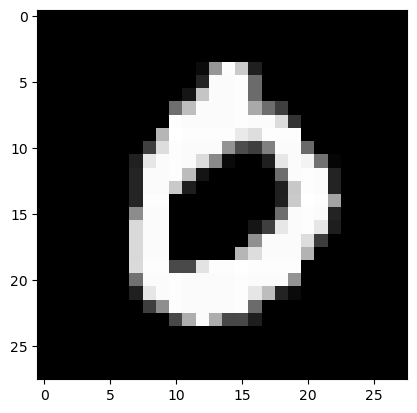

In [8]:
plt.imshow(X_test[3], cmap="gray")


In [9]:
X = X_test.reshape(-1, 28*28)
y = y_test

In [10]:
sc = StandardScaler()
X_ = sc.fit_transform(X)

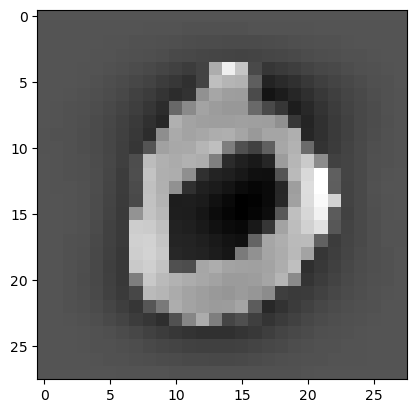

In [12]:
plt.imshow(X_[3].reshape(28,28) , cmap="gray")

In [13]:
pca = PCA(n_components=2)
Z_pca = pca.fit_transform(X_)
Z_pca.shape

(10000, 2)

In [14]:
pca.explained_variance_

array([41.39893397, 28.35105662])

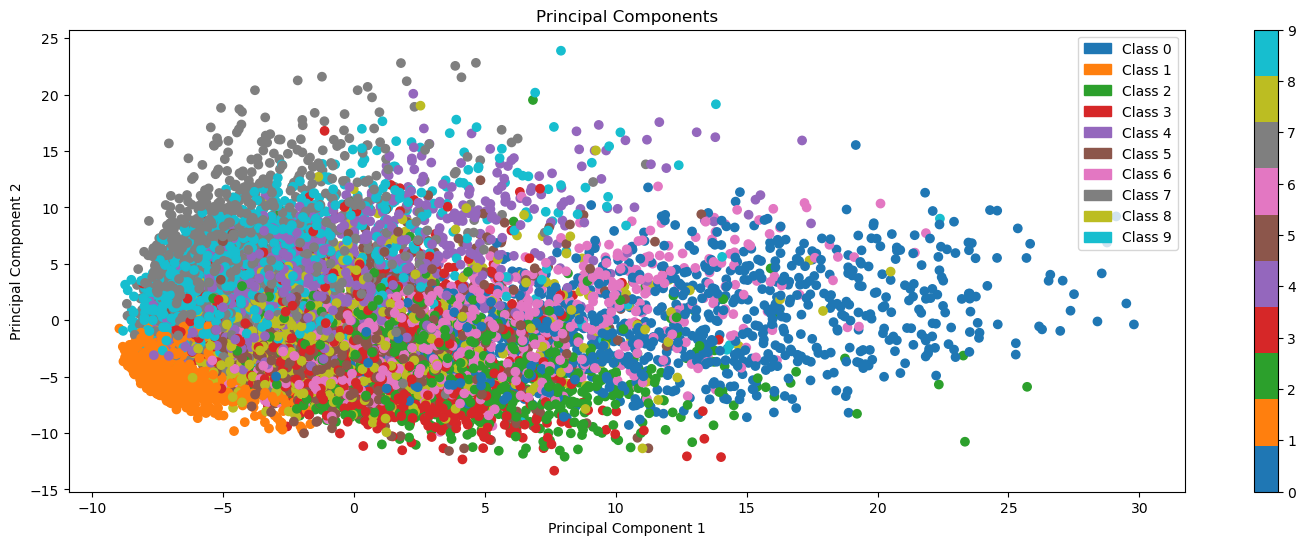

In [29]:
# Create a scatter plot of the principal components
plt.figure(figsize=(18, 6))
#color_map = plt.cm.get_cmap('tab10') #get_cmap => deprecated!

# Create colormap
color_map = colmp.get_cmap('tab10')

########## Define the plot 
plt.scatter(Z_pca[:, 0], Z_pca[:, 1], c=y, cmap=color_map)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components')
plt.colorbar()
## Create a legend for the classes or categories
unique_classes = np.unique(y)
legend_patches = [mpatches.Patch(color=color_map(i), label='Class {}'.format(cls)) for i, cls in enumerate(unique_classes)]
plt.legend(handles=legend_patches)
plt.show()

In [34]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.06196825, 0.04243746])

In [33]:
# Find the cumulative sum explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio

array([0.06196825, 0.10440571])

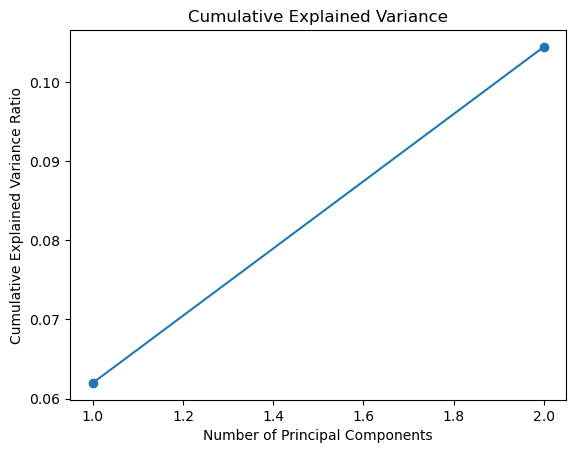

In [32]:
""" Visualize the explained variance ratio """
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')

plt.show()

<h2 style="color:#202dbd"> Reducing Features Using PCA 2 </h2>
Two components are enough or too much?

#### => CASE 1:

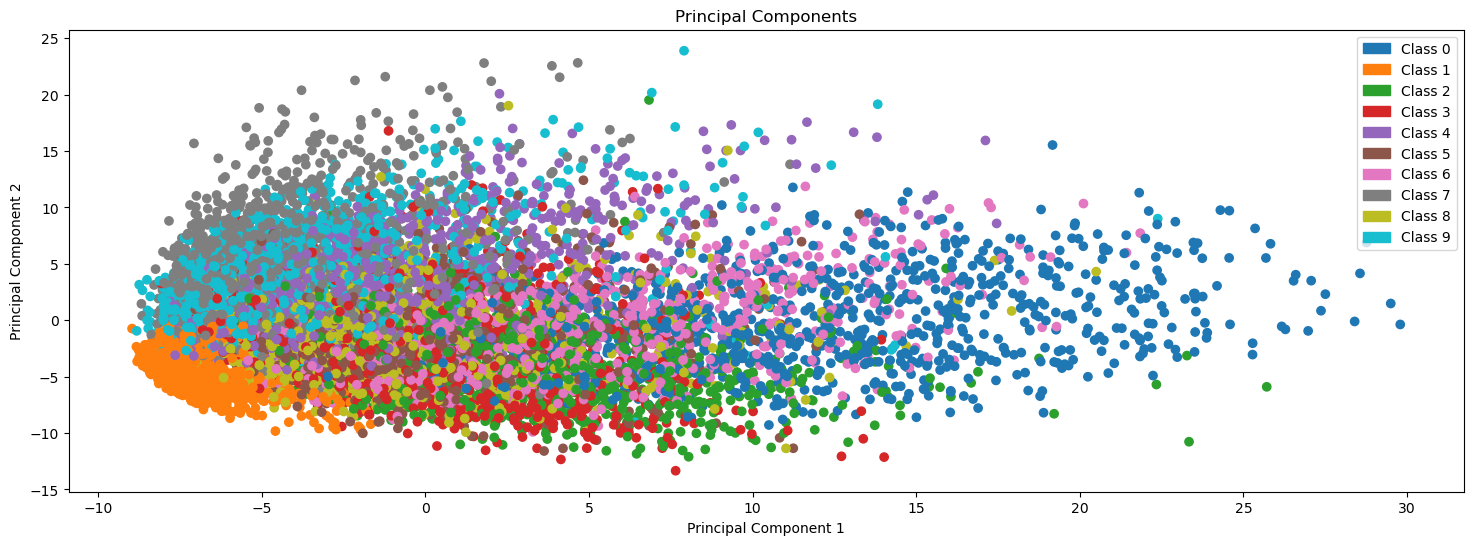

In [43]:
""" This solution works only for an useless threshold value, 
since the the number of components to keep is determined by a too high threshold value.
The first principal component already explains 95% or more of the variance, so only one component is kept, leading to an error. 
"""

# Set a threshold for the cumulative explained variance ratio
threshold = 0.1
# Find the number of components to keep based on the threshold
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= threshold) + 1

# Remove the less informative principal components. Keep the first num_components columns
Z_pca_reduced = Z_pca[:, :num_components]  

###### Display a scatter plot of the remaining principal components
plt.figure(figsize=(18, 6))
plt.scatter(Z_pca_reduced[:, 0], Z_pca_reduced[:, 1], c=y, cmap='tab10')  # Use 'tab10' colormap for colors
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components')

# Create a legend for the classes or categories
unique_classes = np.unique(y)
#legend_patches = [mpatches.Patch(color='tab10', label='Class {}'.format(cls)) for cls in unique_classes]
plt.legend(handles=legend_patches)

plt.show()

#### => CASE 2: ok ! 2 PCs

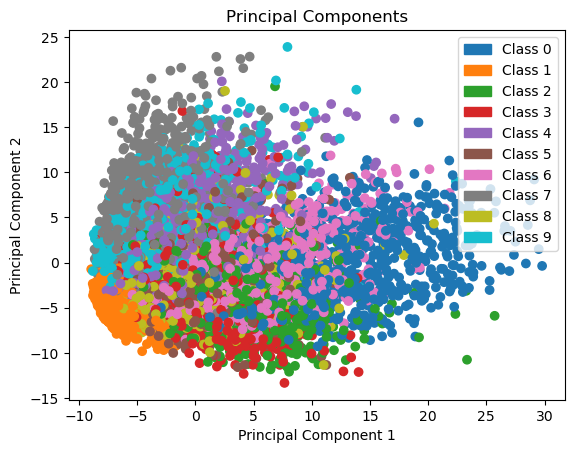

In [46]:
""" Create a scatter plot of the remaining principal components """
if Z_pca_reduced.shape[1] > 1:
    plt.scatter(Z_pca_reduced[:, 0], Z_pca_reduced[:, 1], c=y, cmap='tab10')  #'tab10' colormap for colors
    plt.ylabel('Principal Component 2')
else:
    # Plot on a single dimension
    # In the case of a single component, the other dimension is just zeros for visualization
    plt.scatter(Z_pca_reduced[:, 0], np.zeros(Z_pca_reduced.shape[0]), c=y, cmap='tab10')  

plt.xlabel('Principal Component 1')
plt.title('Principal Components')

# Create a legend for the classes or categories
unique_classes = np.unique(y)
plt.legend(handles=legend_patches)

plt.show()